In [4]:
import keyword
print(keyword.kwlist) 

['False', 'None', 'True', 'and', 'as', 'assert', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [5]:
print(len(keyword.kwlist))

33


In [11]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

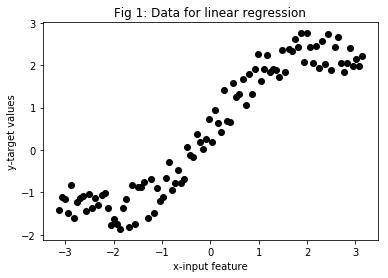

In [12]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [13]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

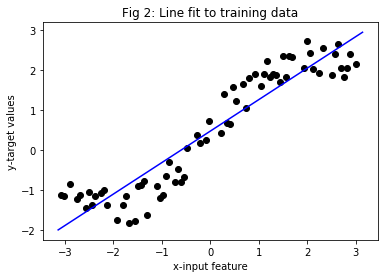

In [14]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

In [17]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  5.369626784587342 
Test MSE:  4.491053950067895


In [22]:
#2. Logistic regression¶
import numpy as np
import pandas as pd
datasets=pd.read_csv(r'Files\iris\iris.csv')
#iris = datasets.load_iris()
iris = datasets
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'